### EDA on Hyperglycemic patients

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

from pandas.plotting import scatter_matrix

import warnings

In [14]:
patient_df = pd.read_csv('../data/hyperglycemic_patients_w_bin_categories.csv', index_col=0)

#Print shape and data preview
print("Dataframe shape:   ", patient_df.shape)
print("Dataframe Features:", patient_df.columns)
patient_df.head()

Dataframe shape:    (13424, 27)
Dataframe Features: Index(['glucose_max', 'anchor_age', 'dod', 'gender', 'dbp_mean', 'sbp_mean',
       'glucose_mean', 'heart_rate_mean', 'spo2_mean', 'resp_rate_mean',
       'temperature_mean', 'apsiii', 'glucose_score', 'los', 'avg_bmi_value',
       'avg_sofa', 'admission_type', 'label', 'AMBULATORY OBSERVATION',
       'DIRECT EMER.', 'DIRECT OBSERVATION', 'ELECTIVE', 'EU OBSERVATION',
       'EW EMER.', 'OBSERVATION ADMIT', 'SURGICAL SAME DAY ADMISSION',
       'URGENT'],
      dtype='object')


,glucose_max,anchor_age,dod,gender,dbp_mean,sbp_mean,glucose_mean,heart_rate_mean,spo2_mean,resp_rate_mean,...,label,AMBULATORY OBSERVATION,DIRECT EMER.,DIRECT OBSERVATION,ELECTIVE,EU OBSERVATION,EW EMER.,OBSERVATION ADMIT,SURGICAL SAME DAY ADMISSION,URGENT
0,277.0,36,0,0,64.320000,112.880000,221.272727,101.800000,92.000000,17.346154,...,0,0,0,0,0,0,0,1,0,0
1,2340.0,35,0,0,77.769231,122.961538,468.592593,105.361111,96.093023,19.813953,...,1,0,0,0,0,0,1,0,0,0
2,259.0,19,1,1,49.300000,74.200000,259.000000,89.750000,70.000000,26.333333,...,0,0,0,0,0,0,1,0,0,0
3,406.0,24,0,0,57.333333,92.848485,292.000000,86.631579,96.162162,15.289474,...,2,0,0,0,0,0,1,0,0,0
4,398.0,31,0,0,78.600000,133.800000,285.000000,100.826087,90.304348,25.173913,...,0,0,0,0,0,0,1,0,0,0


In [15]:
corr_matrix = patient_df.corr()
corr_matrix['los'].sort_values(ascending=False)

los                            1.000000
label                          0.809408
apsiii                         0.383104
avg_sofa                       0.367869
resp_rate_mean                 0.113392
temperature_mean               0.102781
URGENT                         0.084798
heart_rate_mean                0.072761
spo2_mean                      0.056197
dod                            0.051140
ELECTIVE                       0.007792
anchor_age                     0.007638
avg_bmi_value                  0.000783
DIRECT EMER.                   0.000502
AMBULATORY OBSERVATION        -0.005044
SURGICAL SAME DAY ADMISSION   -0.006195
glucose_mean                  -0.006446
OBSERVATION ADMIT             -0.012943
DIRECT OBSERVATION            -0.020328
EU OBSERVATION                -0.030806
gender                        -0.038733
glucose_score                 -0.047090
EW EMER.                      -0.049327
glucose_max                   -0.058765
dbp_mean                      -0.062650


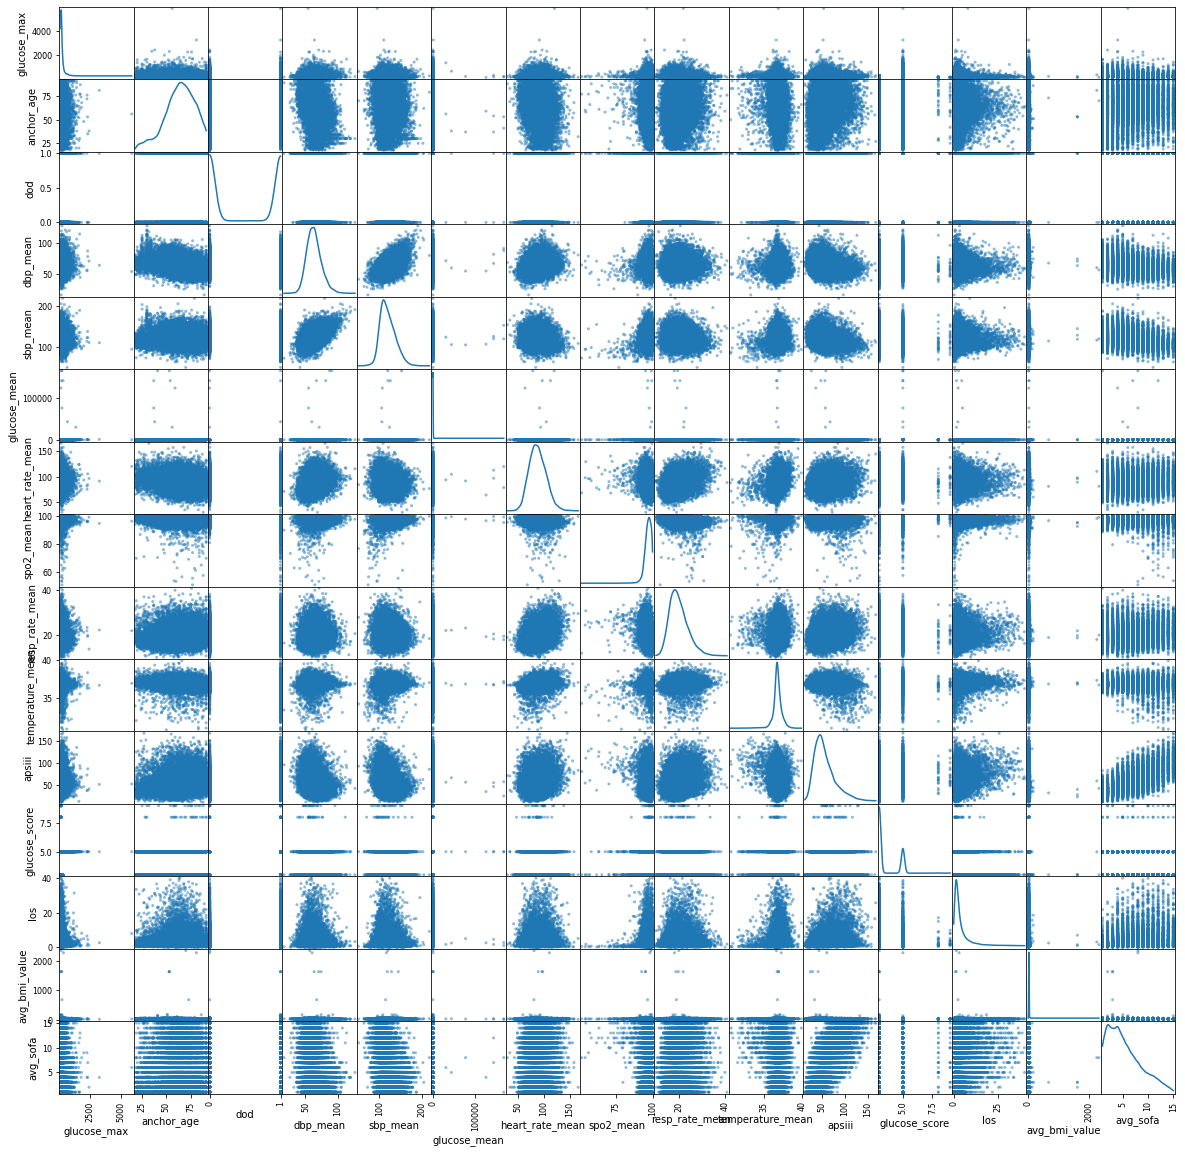

In [18]:
numerical_columns = ['glucose_max', 'anchor_age', 'dod', 'dbp_mean', 'sbp_mean',
       'glucose_mean', 'heart_rate_mean', 'spo2_mean', 'resp_rate_mean',
       'temperature_mean', 'apsiii', 'glucose_score', 'los', 'avg_bmi_value',
       'avg_sofa']

scatter_matrix(patient_df.loc[:, numerical_columns], figsize=[20, 20], diagonal='kde')
plt.show()

In [32]:
categorical_columns = ['AMBULATORY OBSERVATION',
       'DIRECT EMER.', 'DIRECT OBSERVATION', 'ELECTIVE', 'EU OBSERVATION',
       'EW EMER.', 'OBSERVATION ADMIT', 'SURGICAL SAME DAY ADMISSION',
       'URGENT']

# fig, axs = plt.subplot(1, 3, figsize=(9, 3), sharey=True)
for idx, col in enumerate(categorical_columns):
       val_count = patient_df[col].value_counts()[1] 
       print(col, "\nvalue count: ", val_count, "\n")

AMBULATORY OBSERVATION 
value count:  1 

DIRECT EMER. 
value count:  568 

DIRECT OBSERVATION 
value count:  13 

ELECTIVE 
value count:  218 

EU OBSERVATION 
value count:  32 

EW EMER. 
value count:  8171 

OBSERVATION ADMIT 
value count:  1635 

SURGICAL SAME DAY ADMISSION 
value count:  692 

URGENT 
value count:  2094 



Min value: 0.0169791666666666 
Max value:  86.31248842592593


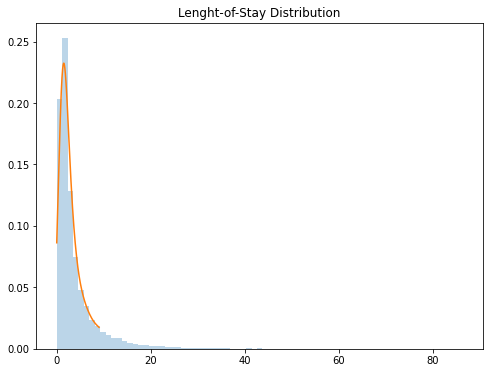

In [20]:
# patient_df.los.plot(kind='hist', bins=60)
print("Min value:", min(patient_df.los), "\nMax value: ", max(patient_df.los))


kde = stats.gaussian_kde(patient_df.los)
X_discrete = np.linspace(0, 9, 1000)

fig, ax = plt.subplots(figsize=(8,6))
ax.hist(patient_df.los, density=True, bins=75, alpha=0.3)
ax.plot(X_discrete, kde(X_discrete))
plt.title("Lenght-of-Stay Distribution")
plt.show()

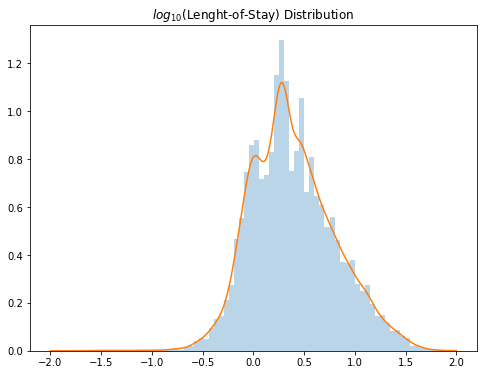

In [28]:
# Lookng at teh log transformation perspective.
patient_df['log10_los'] = np.log10(patient_df.los)

kde = stats.gaussian_kde(patient_df['log10_los'])
X_discrete = np.linspace(-2, 2, 1000)

fig, ax = plt.subplots(figsize=(8,6))
ax.hist(patient_df['log10_los'], density=True, bins=75, alpha=0.3)
ax.plot(X_discrete, kde(X_discrete))
plt.title("$log_{10}$(Lenght-of-Stay) Distribution")
plt.show()